train size= 3224
validation size= 570
50
Epoch 1/50, Train Loss: 1.5561834480248244, Train Acc: 27.543424317617866%, Val Loss: 1.4108590417438083, Val Acc: 24.561403508771928%
Epoch 2/50, Train Loss: 1.3801584360646266, Train Acc: 32.5682382133995%, Val Loss: 1.4328867726855807, Val Acc: 28.421052631578945%
Epoch 3/50, Train Loss: 1.3312183127683752, Train Acc: 36.972704714640194%, Val Loss: 1.4998897711435955, Val Acc: 35.96491228070175%
Epoch 4/50, Train Loss: 1.2537233525631475, Train Acc: 41.997518610421835%, Val Loss: 1.2386949989530776, Val Acc: 38.771929824561404%
Epoch 5/50, Train Loss: 1.122014722403358, Train Acc: 47.39454094292804%, Val Loss: 1.0334997375806172, Val Acc: 51.40350877192983%
Epoch 6/50, Train Loss: 1.0103770552896987, Train Acc: 51.45781637717122%, Val Loss: 0.9312883151902093, Val Acc: 50.175438596491226%
Epoch 7/50, Train Loss: 0.921416746635063, Train Acc: 54.90074441687345%, Val Loss: 1.0933799081378512, Val Acc: 53.68421052631579%
Epoch 8/50, Train Loss: 

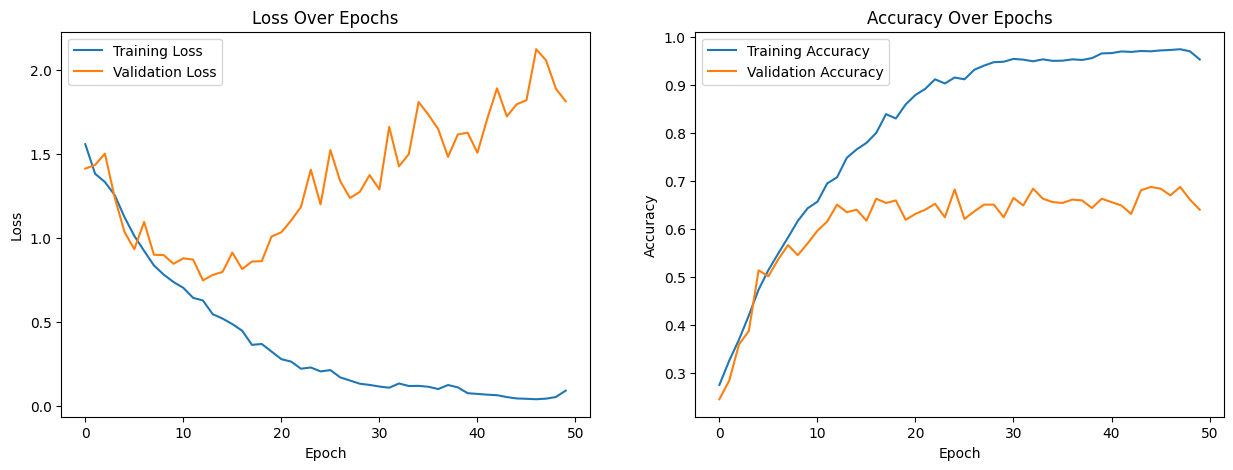

In [1]:
import torch
from torch import optim, nn

from Model.model import MultiLayerFCNet
from DataLoder.dataLoader import custom_loader
from TrainUtils.train_utils import train_epoch, validate_epoch
import Config.config as config
from Utils.utils import save_model, plot_training_results

if __name__ == '__main__':

    train_loader, val_loader = custom_loader(config.BATCH_SIZE, config.TRAIN_DATA_PATH)

    model = MultiLayerFCNet(config.INPUT_SIZE, config.HIDDEN_SIZE, config.OUTPUT_SIZE)
    model = nn.DataParallel(model)
    model.to(config.DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), config.LEARNING_RATE)
    best_acc = 0

    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    print(config.EPOCHS)

    for epoch in range(config.EPOCHS):
        train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer, config.DEVICE)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, config.DEVICE)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Save the best model
        if val_accuracy > best_acc:
            best_acc = val_accuracy
            save_model(model, config.MODEL_SAVE_PATH)

        print(f"Epoch {epoch + 1}/{config.EPOCHS}, Train Loss: {train_loss}, Train Acc: {train_accuracy * 100}%, Val Loss: {val_loss}, Val Acc: {val_accuracy * 100}%")

    # Plotting using utility function
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)
